In [1]:
#Imports data analysis toolkit pandas and aliasing as pd
import pandas as pd
#Imports the entire numpy library and referring it's functions by prefixing each call with np
import numpy as np
#Imports plotting and data visualiastion libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
#Imports calender for time series functionalities
import calendar
#Imports scipy.stats for statistical functionalities
import scipy.stats as stats
#Decision trees
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Imports csv file from the path where the file is located at 
df_2006 = pd.read_csv(r"C:\Users\Jonathan Koh\Desktop\ST2915 Data Files\2006.csv")
df_2007 = pd.read_csv(r"C:\Users\Jonathan Koh\Desktop\ST2915 Data Files\2007.csv")
df_plane_data = pd.read_csv(r"C:\Users\Jonathan Koh\Desktop\ST2915 Data Files\plane-data.csv")
airports = pd.read_csv(r"C:\Users\Jonathan Koh\Desktop\ST2915 Data Files\airports.csv")
carriers = pd.read_csv(r"C:\Users\Jonathan Koh\Desktop\ST2915 Data Files\carriers.csv")

In [3]:
df_2006.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [4]:
#Lists out the columns within the dataframe
# df_2006.columns
df_2007.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
#Lists out the months in the data frame
df_2007.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
#Lists out the months in the data frame
df_2006.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
#Return dataframe with duplicated rows removed by using the function drop_duplicates
df_no_dup_2006 = df_2006.drop_duplicates()
df_no_dup_2007 = df_2007.drop_duplicates()

In [8]:
#define and create a function for removing null stats
def show_nan_stats(df):
    print(df.isnull().sum()*100/len(df)) 

In [9]:
# shows percentage of missing values in the columns
show_nan_stats(df_no_dup_2007)

# #removing null or missing values from specific columns which are required
df_cleaned_2007 = df_no_dup_2007.dropna(subset=['DepTime','ArrTime', 'ArrDelay'])

# #shows percentage of missing values in the columns after removing missing values in columns we require 
show_nan_stats(df_cleaned_2007)

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.156768
CRSDepTime            0.000000
ArrTime               2.387260
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000295
ActualElapsedTime     2.387260
CRSElapsedTime        0.013337
AirTime               2.387260
ArrDelay              2.387260
DepDelay              2.156768
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.000000
TaxiOut               0.000000
Cancelled             0.000000
CancellationCode     97.843218
Diverted              0.000000
CarrierDelay          0.000000
WeatherDelay          0.000000
NASDelay              0.000000
SecurityDelay         0.000000
LateAircraftDelay     0.000000
dtype: float64
Year                  0.000000
Month                 0.000000
DayofMonth            0.

In [10]:
# shows percentage of missing values in the columns
show_nan_stats(df_no_dup_2006)

# #removing null or missing values from specific columns which are required
df_cleaned_2006 = df_no_dup_2006.dropna(subset=['DepTime','ArrTime', 'ArrDelay'])

# #shows percentage of missing values in the columns after removing missing values in columns we require 
show_nan_stats(df_cleaned_2006)

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.707301
CRSDepTime            0.000000
ArrTime               1.933921
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000000
ActualElapsedTime     1.933921
CRSElapsedTime        0.000056
AirTime               1.933921
ArrDelay              1.933921
DepDelay              1.707301
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.000000
TaxiOut               0.000000
Cancelled             0.000000
CancellationCode     98.292699
Diverted              0.000000
CarrierDelay          0.000000
WeatherDelay          0.000000
NASDelay              0.000000
SecurityDelay         0.000000
LateAircraftDelay     0.000000
dtype: float64
Year                   0.0
Month                  0.0
DayofMonth             0.0
DayOf

In [11]:
#Removes cancelled flights
df_cleaned_2007 = df_cleaned_2007[df_cleaned_2007.CancellationCode != 'B']

In [12]:
df_cleaned_2007.CancellationCode.unique()

array([nan], dtype=object)

#### Q1: When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [13]:
df_cleaned_clipped_2006 = df_cleaned_2006.copy()
df_cleaned_clipped_2007 = df_cleaned_2007.copy()

In [14]:
#Changing negative values to 0
df_cleaned_clipped_2006.loc[df_cleaned_clipped_2006.ArrDelay < 0, 'ArrDelay'] = 0
df_cleaned_clipped_2007.loc[df_cleaned_clipped_2007.ArrDelay < 0, 'ArrDelay'] = 0

In [15]:
###Best time of the day to fly

In [16]:
len(df_cleaned_clipped_2006)

7003796

In [17]:
df_cleaned_clipped_2006['ArrDelay']

0           6.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
7141917     0.0
7141918    62.0
7141919    13.0
7141920     0.0
7141921     0.0
Name: ArrDelay, Length: 7003796, dtype: float64

In [18]:
df_cleaned_clipped_2007['ArrDelay']

0           1.0
1           8.0
2          34.0
3          26.0
4           0.0
           ... 
7453210    13.0
7453211     5.0
7453212    15.0
7453213    36.0
7453214    33.0
Name: ArrDelay, Length: 7275260, dtype: float64

In [19]:
#Add leading zeroes to make column values to be 4 digit
df_cleaned_clipped_2006['CRSDepTime'] = df_cleaned_clipped_2006['CRSDepTime'].astype(str).str.zfill(4)
df_cleaned_clipped_2006.CRSDepTime

0          0745
1          1053
2          1915
3          1755
4          0832
           ... 
7141917    1249
7141918    1155
7141919    2115
7141920    2127
7141921    2045
Name: CRSDepTime, Length: 7003796, dtype: object

In [20]:
#Add leading zeroes to make column values to be 4 digit
df_cleaned_clipped_2007['CRSDepTime'] = df_cleaned_clipped_2007['CRSDepTime'].astype(str).str.zfill(4)
df_cleaned_clipped_2007.CRSDepTime

0          1225
1          1905
2          2130
3          1200
4          0830
           ... 
7453210    1605
7453211    1851
7453212    1025
7453213    1315
7453214    1800
Name: CRSDepTime, Length: 7275260, dtype: object

In [21]:
#Returns HH of the column
df_cleaned_clipped_2006['CRSDepTime'] = df_cleaned_clipped_2006['CRSDepTime'].astype(str).str[:2]
df_cleaned_clipped_2006.CRSDepTime

0          07
1          10
2          19
3          17
4          08
           ..
7141917    12
7141918    11
7141919    21
7141920    21
7141921    20
Name: CRSDepTime, Length: 7003796, dtype: object

In [22]:
#Returns HH of the column
df_cleaned_clipped_2007['CRSDepTime'] = df_cleaned_clipped_2007['CRSDepTime'].astype(str).str[:2]
df_cleaned_clipped_2007.CRSDepTime

0          12
1          19
2          21
3          12
4          08
           ..
7453210    16
7453211    18
7453212    10
7453213    13
7453214    18
Name: CRSDepTime, Length: 7275260, dtype: object

In [23]:
#Sort values by CRSDepTime
df_sorted_2006 = df_cleaned_clipped_2006.sort_values(by=['CRSDepTime'])

In [24]:
#Sort values by CRSDepTime
df_sorted_2007 = df_cleaned_clipped_2007.sort_values(by=['CRSDepTime'])

In [25]:
df_sorted_2006.groupby("CRSDepTime").head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5893937,2006,10,11,3,108.0,00,635.0,602,CO,1094,...,6,10,0,NaN,0,0,0,33,0,0
3426181,2006,6,1,4,55.0,00,639.0,635,B6,98,...,12,17,0,NaN,0,0,0,0,0,0
4676010,2006,8,11,5,52.0,00,624.0,635,B6,98,...,16,16,0,NaN,0,0,0,0,0,0
3426582,2006,6,2,5,122.0,00,654.0,635,B6,98,...,12,14,0,NaN,0,0,0,0,0,19
1665838,2006,3,22,3,5.0,00,515.0,545,CO,342,...,9,8,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433966,2006,6,20,2,8.0,23,404.0,335,B6,739,...,4,21,0,NaN,0,18,0,11,0,0
3155905,2006,6,18,7,2257.0,23,651.0,658,UA,38,...,3,13,0,NaN,0,0,0,0,0,0
12121,2006,1,19,4,2333.0,23,636.0,650,US,54,...,4,10,0,NaN,0,0,0,0,0,0
3434303,2006,6,21,3,2351.0,23,335.0,330,B6,727,...,6,23,0,NaN,0,0,0,0,0,0


In [26]:
hours = df_sorted_2006['CRSDepTime'].unique()
hours

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

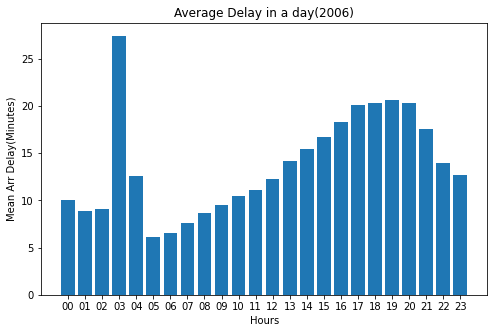

CRSDepTime
00    10.044473
01     8.904417
02     9.047992
03    27.423453
04    12.628627
05     6.084903
06     6.559220
07     7.618613
08     8.666614
09     9.533242
10    10.482894
11    11.101730
12    12.257619
13    14.161007
14    15.436276
15    16.734567
16    18.294912
17    20.129309
18    20.322886
19    20.688656
20    20.344175
21    17.528546
22    14.005805
23    12.663309
Name: ArrDelay, dtype: float64


In [27]:
#Group by month to get mean values of df
df_hours_2006 = df_sorted_2006.groupby("CRSDepTime").mean()
hours = df_sorted_2006['CRSDepTime'].unique()


plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(hours, df_hours_2006['ArrDelay'])
#Labelling x-axis labels as Months in a year
plt.xlabel("Hours")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as mean delay in a day
plt.title("Average Delay in a day(2006)")
plt.show()

print(df_hours_2006['ArrDelay'])

#Conclusion: Best time of the day to fly in 2006 to minimise delays is from 5am to 6am

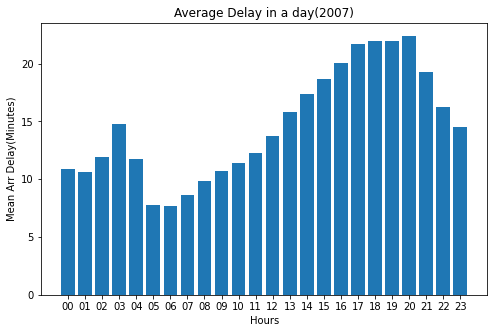

CRSDepTime
00    10.846822
01    10.586852
02    11.903302
03    14.769231
04    11.744070
05     7.756771
06     7.649337
07     8.621571
08     9.876341
09    10.682657
10    11.358346
11    12.241049
12    13.753968
13    15.842342
14    17.383775
15    18.633487
16    20.058752
17    21.700008
18    21.959954
19    21.983325
20    22.386456
21    19.254163
22    16.276056
23    14.553079
Name: ArrDelay, dtype: float64


In [28]:
#Group by scheduled departure time to get mean values of df
df_hours_2007 = df_sorted_2007.groupby("CRSDepTime").mean()
hours = df_sorted_2007.CRSDepTime.unique()
delays = df_hours_2007['ArrDelay'].round(decimals=2)

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(hours, df_hours_2007['ArrDelay'])

#Labelling x-axis labels as Months in a year
plt.xlabel("Hours")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as mean delay in a day
plt.title("Average Delay in a day(2007)")
plt.show()

print(df_hours_2007['ArrDelay'])

#Conclusion: Best time of the day to fly in 2007 to minimise delays is 6am to 7am

In [29]:
#Next Question, best day of week to fly to minimise delay

In [30]:
#Lists out the values within DayofWeek column
df_sorted_2007.DayOfWeek.unique()

array([3, 4, 5, 6, 2, 1, 7], dtype=int64)

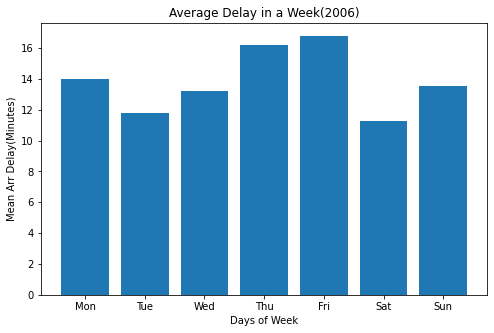

DayOfWeek
1    14.014550
2    11.819409
3    13.227375
4    16.218279
5    16.784030
6    11.253217
7    13.566159
Name: ArrDelay, dtype: float64


In [31]:
#Group by scheduled departure time to get mean values of df
df_week_2006 = df_sorted_2006.groupby("DayOfWeek").mean()

#Get day names in a week
day_names = [d[:3] for d in  list(calendar.day_name)]

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(day_names, df_week_2006['ArrDelay'])
#Labelling x-axis labels as days in a week
plt.xlabel("Days of Week")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as mean delay in a week
plt.title("Average Delay in a Week(2006)")
plt.show()

print(df_week_2006['ArrDelay'])

#Conclusion: Best time of the week to fly in 2006 to minimise delays is Saturday

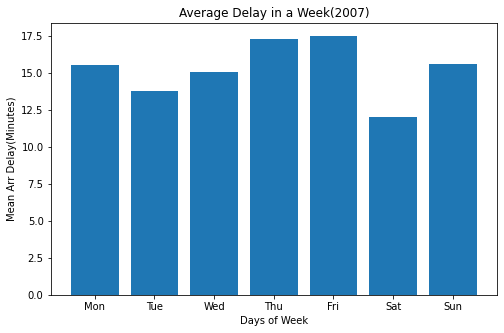

DayOfWeek
1    15.532035
2    13.752364
3    15.092408
4    17.303364
5    17.499824
6    11.993391
7    15.580196
Name: ArrDelay, dtype: float64


In [32]:
#Group by scheduled departure time to get mean values of df
df_week_2007 = df_sorted_2007.groupby("DayOfWeek").mean()

#Get day names in a week
day_names = [d[:3] for d in  list(calendar.day_name)]

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(day_names, df_week_2007['ArrDelay'])
#Labelling x-axis labels as days in a week
plt.xlabel("Days of Week")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as mean delay in a week
plt.title("Average Delay in a Week(2007)")
plt.show()

print(df_week_2007['ArrDelay'])

#Conclusion: Best time of the week to fly in 2007 to minimise delays is Saturday

In [33]:
#####Next Question, best time the year to fly to minimise delays

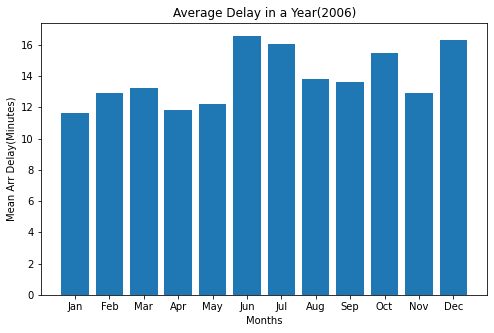

Month
1     11.630761
2     12.893601
3     13.227448
4     11.803820
5     12.186760
6     16.562494
7     16.078327
8     13.777535
9     13.643860
10    15.445827
11    12.942865
12    16.317007
Name: ArrDelay, dtype: float64


In [34]:
#Group by month to get mean values of df
df_month_2006 = df_sorted_2006.groupby("Month").mean()

#Get month names
month_names = [m[:3] for m in  list(calendar.month_name)[1:]]

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(month_names, df_month_2006['ArrDelay'])
#Labelling x-axis labels as Months in a year
plt.xlabel("Months")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as Total Delays by months
plt.title("Average Delay in a Year(2006)")
plt.show()

print(df_month_2006['ArrDelay'])


#Conclusion: Best time of the year to fly in 2006 to minimise delays is in January

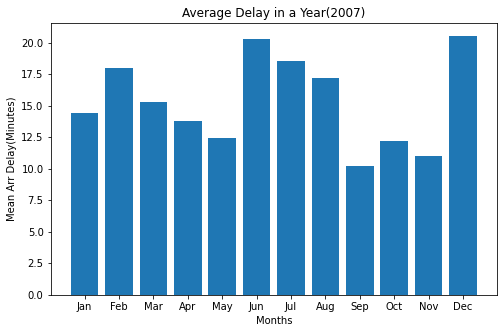

Month
1     14.452809
2     18.015861
3     15.287999
4     13.790829
5     12.466071
6     20.276406
7     18.577661
8     17.217081
9     10.213421
10    12.163154
11    11.022263
12    20.530990
Name: ArrDelay, dtype: float64


In [35]:
#Group by month to get mean values of df
df_month_2007 = df_sorted_2007.groupby("Month").mean()

#Get month names
month_names = [m[:3] for m in  list(calendar.month_name)[1:]]

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.bar(month_names, df_month_2007['ArrDelay'])
#Labelling x-axis labels as Months in a year
plt.xlabel("Months")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Labelling title as Total Delays by months
plt.title("Average Delay in a Year(2007)")
plt.show()

print(df_month_2007['ArrDelay'])

#Conclusion: Best time of the year to fly in 2007 to minimise delays is in September

#### Question 2: Do older planes suffer more delays?

In [36]:
df_cleaned_2006_3 = df_cleaned_2006.copy()
df_cleaned_2007_3 = df_cleaned_2007.copy()

In [37]:
len(df_cleaned_2006_3)

7003796

In [38]:
#Change tailnum to TailNum to merge
df_plane_data = df_plane_data.rename({"tailnum": "TailNum"}, axis=1)

#Merge plane-data to both datasets
df_2006_merged = pd.merge(df_cleaned_2006_3, df_plane_data, on=["TailNum"])
df_2007_merged = pd.merge(df_cleaned_2007_3, df_plane_data, on=["TailNum"])

In [39]:
len(df_2007_merged)

6808742

In [40]:
#Checking for unique years
df_2006_merged.year.unique()

array(['1999', 'None', '1997', '1990', '2000', '1989', '2001', '1998',
       nan, '2005', '1987', '1988', '2002', '1986', '1984', '1995',
       '1996', '1985', '2003', '2004', '1992', '1994', '1991', '1993',
       '1966', '0', '2006', '1957', '1969', '1976', '1975', '1968',
       '1977', '1967', '1971', '1979', '1978', '1980', '1970', '1973',
       '1972', '1956', '2007', '1974', '1963', '1983', '1982', '1959',
       '1964', '1962', '1965'], dtype=object)

In [41]:
df_2007_merged.year.unique()

array(['1995', '1999', '1996', '1994', '1986', '1988', '1997', '1985',
       '1998', '1987', '1984', '2000', '1993', '2005', '2001', '2006',
       '2002', '2004', '2003', 'None', nan, '1966', '0', '1992', '1990',
       '1991', '1989', '1983', '1982', '1957', '1968', '1969', '1967',
       '1975', '1970', '1976', '1980', '1979', '1977', '1971', '1973',
       '1978', '2007', '1956', '1963', '1972', '1964', '1974', '1959',
       '1962', '1965'], dtype=object)

In [42]:
#Replace none and 0000 to na to remove all null value rows
df_2006_merged['year'].replace(['None','0'], np.nan, inplace=True)
df_2007_merged['year'].replace(['None','0'], np.nan, inplace=True)

In [43]:
#Drop null values in year column
df_2006_merged = df_2006_merged[df_2006_merged['year'].notna()]
df_2007_merged = df_2007_merged[df_2007_merged['year'].notna()]

In [44]:
df_2006_merged.year.unique()

array(['1999', '1997', '1990', '2000', '1989', '2001', '1998', '2005',
       '1987', '1988', '2002', '1986', '1984', '1995', '1996', '1985',
       '2003', '2004', '1992', '1994', '1991', '1993', '1966', '2006',
       '1957', '1969', '1976', '1975', '1968', '1977', '1967', '1971',
       '1979', '1978', '1980', '1970', '1973', '1972', '1956', '2007',
       '1974', '1963', '1983', '1982', '1959', '1964', '1962', '1965'],
      dtype=object)

In [45]:
len(df_2006_merged)

5303569

In [46]:
#Remove plane year older than dataset year
df_2006_merged = df_2006_merged[df_2006_merged.year != '2007']

In [47]:
#Creates new column age as plane year deducted by year of dataset
df_2006_merged['age'] = 2006 - df_2006_merged['year'].astype(str).astype(int)
df_2007_merged['age'] = 2007 - df_2007_merged['year'].astype(str).astype(int)

In [48]:
#Sort values by Age
df_2006_merged.sort_values(by=['age'], inplace = True)
df_2007_merged.sort_values(by=['age'], inplace = True)

In [49]:
df_2007_merged.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
6808741,2007,12,31,1,752.0,800,1546.0,1623,B6,640,...,0,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007,0
6716803,2007,6,10,7,1228.0,1235,2031.0,2025,FL,44,...,0,Corporation,BOEING,3/15/2007,737-7BD,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007,0
6716804,2007,6,11,1,932.0,935,1148.0,1145,FL,39,...,0,Corporation,BOEING,3/15/2007,737-7BD,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007,0
6716805,2007,6,11,1,1239.0,1235,2014.0,2025,FL,44,...,0,Corporation,BOEING,3/15/2007,737-7BD,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007,0
6716806,2007,6,12,2,2059.0,2035,7.0,2219,FL,187,...,0,Corporation,BOEING,3/15/2007,737-7BD,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007,0


In [50]:
#Creates new dataframe with columns needed
df_age_delay_2006 = df_2006_merged[['ArrDelay', 'DepDelay', 'age']]
df_age_delay_2007 = df_2007_merged[['ArrDelay', 'DepDelay', 'age']]

In [51]:
plane_delays_2006 = df_age_delay_2006.copy()
plane_delays_2007 = df_age_delay_2007.copy()

In [52]:
#Sets delays to be true for delays more than 0 and false for delays less than or equals to 0
plane_delays_2006.loc[plane_delays_2006['ArrDelay'] > 0, 'Arr_Delayed'] = 'True' 
plane_delays_2006.loc[plane_delays_2006['ArrDelay'] <= 0, 'Arr_Delayed'] = 'False' 
plane_delays_2006.loc[plane_delays_2006['DepDelay'] > 0, 'Dep_Delayed'] = 'True' 
plane_delays_2006.loc[plane_delays_2006['DepDelay'] <= 0, 'Dep_Delayed'] = 'False'

In [53]:
plane_delays_2007.loc[plane_delays_2007['ArrDelay'] > 0, 'Arr_Delayed'] = 'True' 
plane_delays_2007.loc[plane_delays_2007['ArrDelay'] <= 0, 'Arr_Delayed'] = 'False' 
plane_delays_2007.loc[plane_delays_2007['DepDelay'] > 0, 'Dep_Delayed'] = 'True' 
plane_delays_2007.loc[plane_delays_2007['DepDelay'] <= 0, 'Dep_Delayed'] = 'False'

In [54]:
#Replaces true, false with 1, 0
plane_delays_2006.replace('False', 0, inplace = True)
plane_delays_2006.replace('True', 1, inplace = True)
plane_delays_2007.replace('False', 0, inplace = True)
plane_delays_2007.replace('True', 1, inplace = True)

In [55]:
#Drop columns not needed
plane_delays_2006.drop(columns = ['ArrDelay', 'DepDelay'], inplace = True)
plane_delays_2007.drop(columns = ['ArrDelay', 'DepDelay'], inplace = True)

In [56]:
plane_delays_2006.age.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 50])

In [57]:
len(df_age_delay_2006)

5301757

In [58]:
#Get total counts of 1,0 groupby age
arr_true = 1
arr_true_counts_2006 = (
    plane_delays_2006
        .groupby("age")
        .apply(lambda group: group.Arr_Delayed.eq(arr_true).sum()))

arr_false = 0
arr_false_counts_2006 = (
    plane_delays_2006
        .groupby("age")
        .apply(lambda group: group.Arr_Delayed.eq(arr_false).sum()))

dep_true = 1
dep_true_counts_2006 = (
    plane_delays_2006
        .groupby("age")
        .apply(lambda group: group.Dep_Delayed.eq(dep_true).sum()))

dep_false = 0
dep_false_counts_2006 = (
    plane_delays_2006
        .groupby("age")
        .apply(lambda group: group.Dep_Delayed.eq(dep_false).sum()))

In [59]:
#Get total counts of 1,0 groupby age
arr_true = 1
arr_true_counts_2007 = (
    plane_delays_2007
        .groupby("age")
        .apply(lambda group: group.Arr_Delayed.eq(arr_true).sum()))

arr_false = 0
arr_false_counts_2007 = (
    plane_delays_2007
        .groupby("age")
        .apply(lambda group: group.Arr_Delayed.eq(arr_false).sum()))

dep_true = 1
dep_true_counts_2007 = (
    plane_delays_2007
        .groupby("age")
        .apply(lambda group: group.Dep_Delayed.eq(dep_true).sum()))

dep_false = 0
dep_false_counts_2007 = (
    plane_delays_2007
        .groupby("age")
        .apply(lambda group: group.Dep_Delayed.eq(dep_false).sum()))

In [60]:
#Creates a pd series
atc_2006 = pd.Series(arr_true_counts_2006)
afc_2006 = pd.Series(arr_false_counts_2006)
dtc_2006 = pd.Series(dep_true_counts_2006)
dfc_2006 = pd.Series(dep_false_counts_2006)

atc_2007 = pd.Series(arr_true_counts_2007)
afc_2007 = pd.Series(arr_false_counts_2007)
dtc_2007 = pd.Series(dep_true_counts_2007)
dfc_2007 = pd.Series(dep_false_counts_2007)
names = ['Delayed', 'Not_Delayed']

In [61]:
#Set column names
names = ['Delayed', 'Not_Delayed']
#Concat series to a dataframe
arr_delays_2006 = pd.concat([atc_2006, afc_2006], axis = 1, keys = names)
dep_delays_2006 = pd.concat([dtc_2006, dfc_2006], axis = 1, keys = names)
arr_delays_2007 = pd.concat([atc_2007, afc_2007], axis = 1, keys = names)
dep_delays_2007 = pd.concat([dtc_2007, dfc_2007], axis = 1, keys = names)

In [62]:
#Create column showing total flights and % of flights delayed
arr_delays_2006['Total_Flights'] = arr_delays_2006['Delayed'] + arr_delays_2006['Not_Delayed'] 
arr_delays_2006['%_Delayed'] = arr_delays_2006['Delayed'] / arr_delays_2006['Total_Flights'] * 100

dep_delays_2006['Total_Flights'] = dep_delays_2006['Delayed'] + dep_delays_2006['Not_Delayed'] 
dep_delays_2006['%_Delayed'] = dep_delays_2006['Delayed'] / dep_delays_2006['Total_Flights'] * 100

arr_delays_2007['Total_Flights'] = arr_delays_2007['Delayed'] + arr_delays_2007['Not_Delayed'] 
arr_delays_2007['%_Delayed'] = arr_delays_2007['Delayed'] / arr_delays_2007['Total_Flights'] * 100

dep_delays_2007['Total_Flights'] = dep_delays_2007['Delayed'] + dep_delays_2007['Not_Delayed'] 
dep_delays_2007['%_Delayed'] = dep_delays_2007['Delayed'] / dep_delays_2007['Total_Flights'] * 100


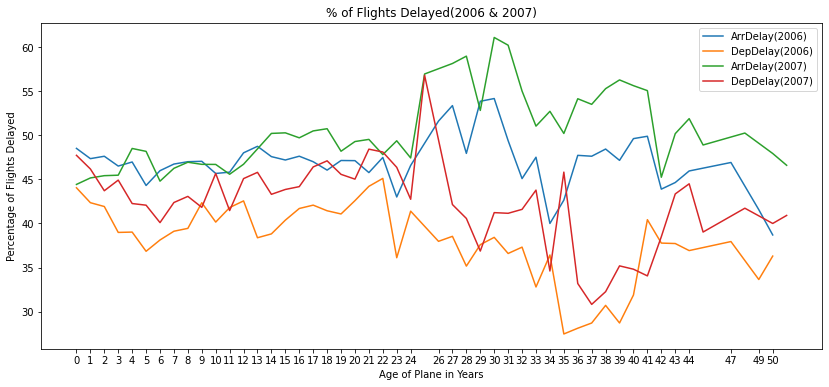

In [63]:
# % ofArrival flights delayed 2006
plt.figure(figsize=(14,6))
plt.plot(arr_delays_2006.index, arr_delays_2006["%_Delayed"], label="ArrDelay(2006)")
plt.plot(dep_delays_2006.index, dep_delays_2006["%_Delayed"], label="DepDelay(2006)")
plt.plot(arr_delays_2007.index, arr_delays_2007["%_Delayed"], label="ArrDelay(2007)")
plt.plot(dep_delays_2007.index, dep_delays_2007["%_Delayed"], label="DepDelay(2007)")
plt.title("% of Flights Delayed(2006 & 2007)")
plt.xlabel("Age of Plane in Years")
plt.ylabel("Percentage of Flights Delayed")
plt.xticks(arr_delays_2006.index)
plt.legend(loc='best')
plt.show()

In [64]:
arr_delays_2006.head()

,Delayed,Not_Delayed,Total_Flights,%_Delayed
age,,,,
0,39364,41787,81151,48.507104
1,125926,140051,265977,47.344695
2,152059,167297,319356,47.614261
3,186381,214407,400788,46.503638
4,201856,227943,429799,46.965209


In [65]:
arr_delays_2006

,Delayed,Not_Delayed,Total_Flights,%_Delayed
age,,,,
0,39364,41787,81151,48.507104
1,125926,140051,265977,47.344695
2,152059,167297,319356,47.614261
3,186381,214407,400788,46.503638
4,201856,227943,429799,46.965209
5,229928,289049,518977,44.304083
6,177459,208482,385941,45.980862
7,183103,208714,391817,46.731765
8,155242,175073,330315,46.998168


In [66]:
dep_delays_2006

,Delayed,Not_Delayed,Total_Flights,%_Delayed
age,,,,
0,35741,45410,81151,44.042587
1,112650,153327,265977,42.353286
2,133873,185483,319356,41.919676
3,156248,244540,400788,38.985199
4,167719,262080,429799,39.022659
5,191228,327749,518977,36.847105
6,147152,238789,385941,38.128108
7,153277,238540,391817,39.119538
8,130291,200024,330315,39.444470


In [67]:
arr_delays_2007

,Delayed,Not_Delayed,Total_Flights,%_Delayed
age,,,,
0,38752,48482,87234,44.423046
1,108145,131337,239482,45.157882
2,148655,178671,327326,45.414969
3,189070,226741,415811,45.470178
4,214234,227504,441738,48.497978
5,221197,238009,459206,48.169449
6,262220,323169,585389,44.794145
7,225695,262294,487989,46.250018
8,210051,237450,447501,46.938666


In [68]:
dep_delays_2007

,Delayed,Not_Delayed,Total_Flights,%_Delayed
age,,,,
0,41627,45607,87234,47.718779
1,110579,128903,239482,46.174243
2,143067,184259,327326,43.707802
3,186748,229063,415811,44.911751
4,186664,255074,441738,42.256722
5,193191,266015,459206,42.070661
6,234721,350668,585389,40.096585
7,206785,281204,487989,42.374931
8,192730,254771,447501,43.068060


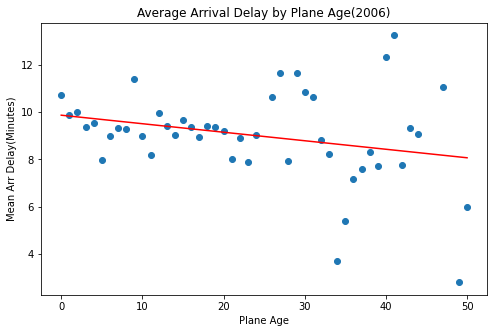

,ArrDelay,DepDelay,age
0,10.714138,11.273601,0.0
1,9.902789,11.075664,1.0
2,10.029553,11.077096,2.0
3,9.365692,10.473290,3.0
4,9.564920,10.267814,4.0
5,7.961085,8.587292,5.0
6,8.997251,9.579941,6.0
7,9.341126,10.160886,7.0
8,9.276391,10.041242,8.0
9,11.393542,13.091341,9.0


In [69]:
#Group by age to get mean values of df
df_age_2006 = df_age_delay_2006.groupby(df_age_delay_2006.age.values).mean().transform(lambda x: x)

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.scatter(df_age_2006.age, df_age_2006['ArrDelay'])
#Labelling x-axis labels as Plane Age
plt.xlabel("Plane Age")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Label title
plt.title("Average Arrival Delay by Plane Age(2006)")

m, b = np.polyfit(df_age_2006.age, df_age_2006.ArrDelay, 1)
plt.plot(df_age_2006.age, m*df_age_2006.age + b, color='red')

plt.show()
df_age_2006

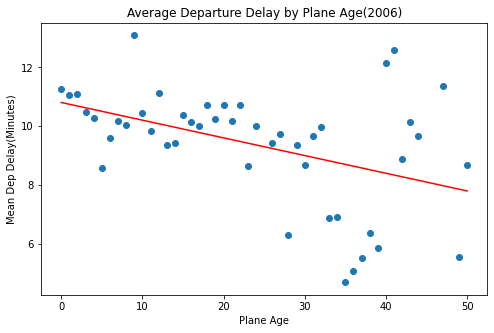

,ArrDelay,DepDelay,age
0,10.714138,11.273601,0.0
1,9.902789,11.075664,1.0
2,10.029553,11.077096,2.0
3,9.365692,10.473290,3.0
4,9.564920,10.267814,4.0
5,7.961085,8.587292,5.0
6,8.997251,9.579941,6.0
7,9.341126,10.160886,7.0
8,9.276391,10.041242,8.0
9,11.393542,13.091341,9.0


In [70]:
#Group by age to get mean values of df
df_age_2006 = df_age_delay_2006.groupby(df_age_delay_2006.age.values).mean().transform(lambda x: x)

plt.figure(figsize=(8,5))
# Plot months against mean dep delay
plt.scatter(df_age_2006.age, df_age_2006['DepDelay'])
#Labelling x-axis labels as Plane Age
plt.xlabel("Plane Age")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Dep Delay(Minutes)")
#Label title
plt.title("Average Departure Delay by Plane Age(2006)")
m, b = np.polyfit(df_age_2006.age, df_age_2006.DepDelay, 1)
plt.plot(df_age_2006.age, m*df_age_2006.age + b,color='red')
plt.show()

df_age_2006

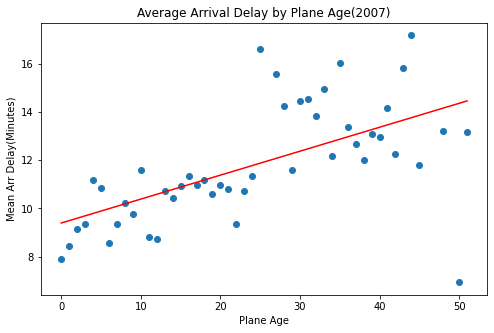

,ArrDelay,DepDelay,age
0,7.899833,10.910241,0.0
1,8.427890,10.970937,1.0
2,9.151290,11.193153,2.0
3,9.369110,11.495747,3.0
4,11.195931,12.181741,4.0
5,10.828116,11.721371,5.0
6,8.580182,9.784685,6.0
7,9.358422,10.772181,7.0
8,10.211389,11.681417,8.0
9,9.783747,11.067240,9.0


In [71]:
#Group by age to get mean values of df
df_age_2007 = df_age_delay_2007.groupby(df_age_delay_2007.age.values).mean().transform(lambda x: x)

plt.figure(figsize=(8,5))
# Plot months against mean arr delay
plt.scatter(df_age_2007.age, df_age_2007['ArrDelay'])
#Labelling x-axis labels as Plane Age
plt.xlabel("Plane Age")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Arr Delay(Minutes)")
#Label title
plt.title("Average Arrival Delay by Plane Age(2007)")
m, b = np.polyfit(df_age_2007.age, df_age_2007.ArrDelay, 1)
plt.plot(df_age_2007.age, m*df_age_2007.age + b, color='red')
plt.show()

df_age_2007

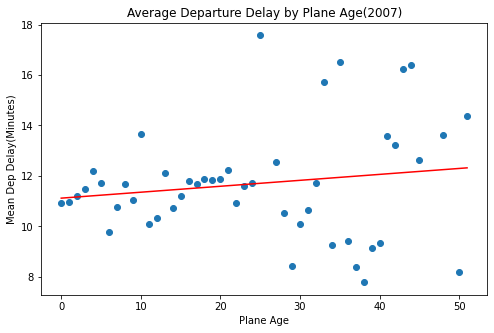

,ArrDelay,DepDelay,age
0,7.899833,10.910241,0.0
1,8.427890,10.970937,1.0
2,9.151290,11.193153,2.0
3,9.369110,11.495747,3.0
4,11.195931,12.181741,4.0
5,10.828116,11.721371,5.0
6,8.580182,9.784685,6.0
7,9.358422,10.772181,7.0
8,10.211389,11.681417,8.0
9,9.783747,11.067240,9.0


In [72]:
#Group by age to get mean values of df
df_age_2007 = df_age_delay_2007.groupby(df_age_delay_2007.age.values).mean().transform(lambda x: x)

plt.figure(figsize=(8,5))
# Plot months against mean dep delay
plt.scatter(df_age_2007.age, df_age_2007['DepDelay'])
#Labelling x-axis labels as Plane Age
plt.xlabel("Plane Age")
#Labelling y-axis labels as mean arrival delay
plt.ylabel("Mean Dep Delay(Minutes)")
#Label title
plt.title("Average Departure Delay by Plane Age(2007)")
m, b = np.polyfit(df_age_2007.age, df_age_2007.DepDelay, 1)
plt.plot(df_age_2007.age, m*df_age_2007.age + b, color='red')
plt.show()

df_age_2007

In [73]:
len(df_age_delay_2007)

6263085

#### Q3: How does the number of people flying between different locations change over time?

In [74]:
#df_combined = pd.concat([df_2006, df_2007], ignore_index=True, sort=False)

In [75]:
#Make lists of iata and state from airports csv columns
iata_code = airports.iata.tolist()
list_states = airports.state.tolist()

In [76]:
df_cleaned_2006_4 = df_cleaned_2006.copy()
df_cleaned_2007_4 = df_cleaned_2007.copy()

In [77]:
#create a new dataframe with origin and dest columns
df_origin_dest_2006 = df_cleaned_2006_4[['Origin','Dest']]

In [78]:
df_origin_dest_2006.head()

,Origin,Dest
0,ATL,PHX
1,ATL,PHX
2,ATL,PHX
3,AUS,PHX
4,AUS,PHX


In [79]:
#create a new dataframe with origin and dest columns
df_origin_dest_2007 = df_cleaned_2007_4[['Origin','Dest']]

In [80]:
#creates a new column, origin_states by replacing iata_code within origin column with list_states
df_origin_dest_2006['origin_states'] = df_origin_dest_2006['Origin'].replace(iata_code, list_states)

KeyboardInterrupt: 

In [ ]:
#creates a new column, dest_states by replacing iata_code within dest column with list_states
df_origin_dest_2006['dest_states'] = df_origin_dest_2006['Dest'].replace(iata_code, list_states)

In [ ]:
#creates a new column, origin_states by replacing iata_code within origin column with list_states
df_origin_dest_2007['origin_states'] = df_origin_dest_2007['Origin'].replace(iata_code, list_states)

In [ ]:
#creates a new column, dest_states by replacing iata_code within dest column with list_states
df_origin_dest_2007['dest_states'] = df_origin_dest_2007['Dest'].replace(iata_code, list_states)

In [ ]:
#Creates new column, Route, by joining origin states and dest states
df_origin_dest_2006["Route"] = df_origin_dest_2006['origin_states'] + " to " + df_origin_dest_2006['dest_states']
df_origin_dest_2006.Route.head()

In [ ]:
#Creates new column, Route, by joining origin states and dest states
df_origin_dest_2007["Route"] = df_origin_dest_2007['origin_states'] + " to " + df_origin_dest_2007['dest_states']
df_origin_dest_2007.Route.head()

In [ ]:
#Show null values in percentage in dataframe
show_nan_stats(df_origin_dest_2007)

In [ ]:
#Remove null values 
df_routes_2006 = df_origin_dest_2006.dropna(subset=['Route'])
df_routes_2007 = df_origin_dest_2007.dropna(subset=['Route'])

In [ ]:
show_nan_stats(df_routes_2006)

In [ ]:
show_nan_stats(df_routes_2007)

In [ ]:
len(df_routes_2006)

In [ ]:
#Get top 20 values counts of each variables within route column
df_routes_2006['Route'].value_counts().head(20)

In [ ]:
#Get top 20 values counts of each variables within route column
df_routes_2007['Route'].value_counts().head(20)

In [ ]:
#Creates a new dataframe using top 20 value counts
value_counts_2006 = df_routes_2006['Route'].value_counts().head(20)
top_20_routes_2006 = pd.DataFrame(value_counts_2006).reset_index()
#Naming new dataframe columnes
top_20_routes_2006.columns = ['Routes', 'Counts']
top_20_routes_2006

In [ ]:
#Creates a new dataframe using top 20 value counts
value_counts_2007 = df_routes_2007['Route'].value_counts().head(20)
top_20_routes_2007 = pd.DataFrame(value_counts_2007).reset_index()
#Naming new dataframe columnes
top_20_routes_2007.columns = ['Routes', 'Counts']
top_20_routes_2007

In [ ]:
#merge 2006 and 2007 datasets into one
pd_combined_top_routes = pd.merge(top_20_routes_2006,top_20_routes_2007, how='outer', on=['Routes'], suffixes = ('2006','2007')).set_index("Routes")
#Rename column names
pd_combined_top_routes.rename(columns={'Counts2006':'2006', 'Counts2007':'2007'}, inplace=True)

#Plot routes against total flights
pd_combined_top_routes.plot.bar(figsize=(15,10))
#Labelling x-axis labels as Routes per states
plt.xlabel("Routes(States)")
#Labelling y-axis labels as total flights within in a year
plt.ylabel("Total Flights")
#Labelling title as Top 20 flights between 2006 and 2007
plt.title("Top 20 flights between States(2006 vs 2007)")
#Select best location to place lengend
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(pd_combined_top_routes)

In [ ]:
pd_combined_top_routes

#### Q4: Can you detect cascading failures as delays in one airport create delays in others?

In [14]:
df_cleaned_2006.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003796 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [15]:
#Creates new dataframe to work wtih
df_delays_2006 = df_cleaned_2006.copy()
df_delays_2007 = df_cleaned_2007.copy()

In [16]:
#Subsetting one month
df_jan_2006 = df_delays_2006.loc[df_delays_2006['Month'] == 1]
df_jan_2007 = df_delays_2007.loc[df_delays_2007['Month'] == 1]

In [17]:
df_jan_2006.DayofMonth.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
      dtype=int64)

In [18]:
len(df_jan_2006)

570130

In [19]:
len(df_jan_2007)

604580

In [20]:
df_jan_2006.Dest.value_counts().head(10)

ATL    32526
ORD    29638
DFW    24961
LAX    18785
PHX    17954
DEN    17748
IAH    17303
LAS    14851
EWR    12218
CVG    11716
Name: Dest, dtype: int64

In [21]:
df_jan_2006.Origin.value_counts().head(10)

ATL    32496
ORD    29791
DFW    24953
LAX    18788
PHX    18005
DEN    17781
IAH    17403
LAS    14830
EWR    12224
CVG    11754
Name: Origin, dtype: int64

In [22]:
df_jan_2007.Dest.value_counts().head(10)

ATL    31305
ORD    30453
DFW    23604
DEN    19579
LAX    19291
IAH    18009
PHX    17781
LAS    14880
DTW    14782
MSP    12769
Name: Dest, dtype: int64

In [23]:
df_jan_2007.Origin.value_counts().head(10)

ATL    31496
ORD    30494
DFW    23672
DEN    19609
LAX    19300
IAH    18000
PHX    17804
LAS    14863
DTW    14787
MSP    12775
Name: Origin, dtype: int64

In [24]:
df_jan_2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [25]:
#Filter rows with 'ATL' as Origin and Destination
jan_atl_org_2006 = df_jan_2006.loc[(df_jan_2006['Origin'] == 'ATL')]
jan_atl_dest_2006 = df_jan_2006.loc[(df_jan_2006['Dest'] == 'ATL')]
atl_org_2006 = jan_atl_org_2006.groupby("DayofMonth").sum()
atl_dest_2006 = jan_atl_dest_2006.groupby("DayofMonth").sum()

In [26]:
atl_dest_2006.DepDelay

DayofMonth
1     14318.0
2     89005.0
3     31864.0
4      7215.0
5      3381.0
6      3950.0
7      3136.0
8      3792.0
9      1009.0
10     -755.0
11     4434.0
12     6592.0
13    30360.0
14     6030.0
15     3785.0
16    10463.0
17    26828.0
18     7402.0
19     1497.0
20     2648.0
21     2237.0
22    77091.0
23    66011.0
24     3769.0
25      587.0
26     1295.0
27       96.0
28     -938.0
29     8209.0
30    10692.0
31      775.0
Name: DepDelay, dtype: float64

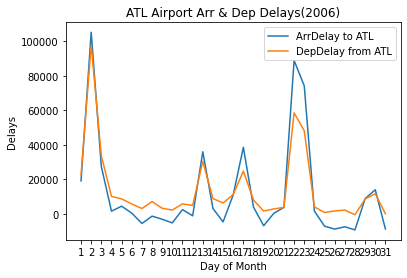

In [27]:
#Plotting
plt.plot(atl_dest_2006.index, atl_dest_2006["ArrDelay"], label = "ArrDelay to ATL")
plt.plot(atl_org_2006.index, atl_org_2006["DepDelay"], label = "DepDelay from ATL")
plt.title("ATL Airport Arr & Dep Delays(2006)")
plt.xlabel("Day of Month")
plt.ylabel("Delays")
plt.legend(loc="best")
plt.xticks(atl_dest_2006.index)
plt.show()

In [28]:
#Filter rows with 'ORD' as Origin and Destination
jan_ord_org_2006 = df_jan_2006.loc[(df_jan_2006['Origin'] == 'ORD')]
jan_ord_dest_2006 = df_jan_2006.loc[(df_jan_2006['Dest'] == 'ORD')]
ord_org_2006 = jan_ord_org_2006.groupby("DayofMonth").sum()
ord_dest_2006 = jan_ord_dest_2006.groupby("DayofMonth").sum()

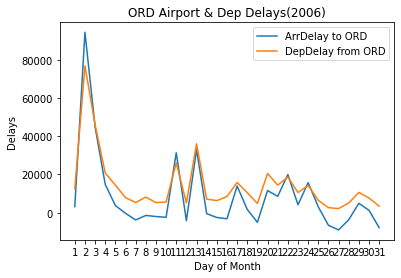

In [29]:
plt.plot(ord_dest_2006.index, ord_dest_2006["ArrDelay"], label = "ArrDelay to ORD")
plt.plot(ord_org_2006.index, ord_org_2006["DepDelay"], label = "DepDelay from ORD")
plt.title("ORD Airport & Dep Delays(2006)")
plt.xlabel("Day of Month")
plt.ylabel("Delays")
plt.legend(loc="best")
plt.xticks(ord_dest_2006.index)
plt.show()

In [30]:
#Filter rows with 'ATL' as Origin and Destination
jan_atl_org_2007 = df_jan_2007.loc[(df_jan_2007['Origin'] == 'ATL')]
jan_atl_dest_2007 = df_jan_2007.loc[(df_jan_2007['Dest'] == 'ATL')]
atl_org_2007 = jan_atl_org_2007.groupby("DayofMonth").sum()
atl_dest_2007 = jan_atl_dest_2007.groupby("DayofMonth").sum()

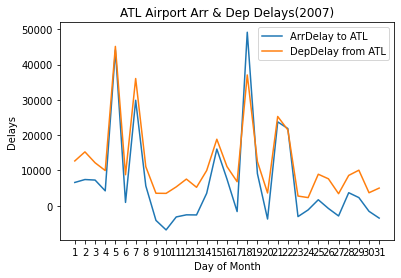

In [31]:
plt.plot(atl_dest_2007.index, atl_dest_2007["ArrDelay"], label = "ArrDelay to ATL")
plt.plot(atl_org_2007.index, atl_org_2007["DepDelay"], label = "DepDelay from ATL")
plt.title("ATL Airport Arr & Dep Delays(2007)")
plt.xlabel("Day of Month")
plt.ylabel("Delays")
plt.legend(loc="best")
plt.xticks(atl_dest_2007.index)
plt.show()

In [32]:
#Filter rows with 'ORD' as Origin and Destination
jan_ord_org_2007 = df_jan_2007.loc[(df_jan_2007['Origin'] == 'ORD')]
jan_ord_dest_2007 = df_jan_2007.loc[(df_jan_2007['Dest'] == 'ORD')]
ord_org_2007 = jan_ord_org_2007.groupby("DayofMonth").sum()
ord_dest_2007 = jan_ord_dest_2007.groupby("DayofMonth").sum()

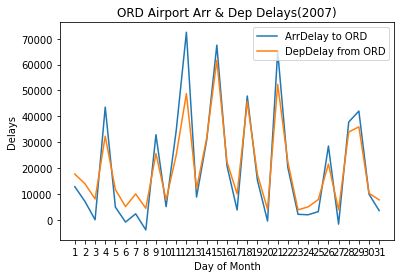

In [33]:
plt.plot(ord_dest_2007.index, ord_dest_2007["ArrDelay"], label = "ArrDelay to ORD")
plt.plot(ord_org_2007.index, ord_org_2007["DepDelay"], label = "DepDelay from ORD")
plt.title("ORD Airport Arr & Dep Delays(2007)")
plt.xlabel("Day of Month")
plt.ylabel("Delays")
plt.legend(loc="best")
plt.xticks(ord_dest_2007.index)
plt.show()

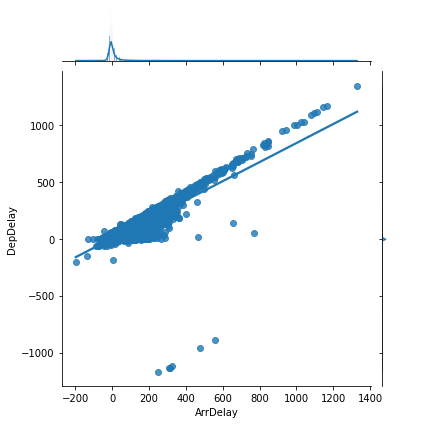

In [34]:
#Data visualisation
sns.jointplot(data=df_jan_2006, x="ArrDelay", y="DepDelay", kind="reg")

In [35]:
arr_dep_2006 = pd.DataFrame(df_jan_2006, columns = ['ArrDelay', 'DepDelay'])
arr_dep_2007 = pd.DataFrame(df_jan_2007, columns = ['ArrDelay', 'DepDelay'])

,ArrDelay,DepDelay
ArrDelay,1.000000,0.911926
DepDelay,0.911926,1.000000


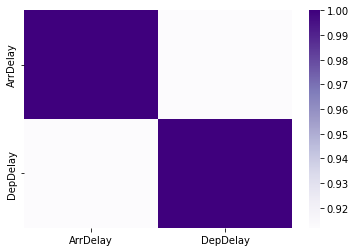

In [36]:
#Pearson correlation
corr_jan_2006 = arr_dep_2006.corr(method='pearson')
sns.heatmap(corr_jan_2006, cmap="Purples")
corr_jan_2006

In [37]:
df_jan_2006['ArrDelay'].corr(df_jan_2006['DepDelay'])

0.9119258444781879

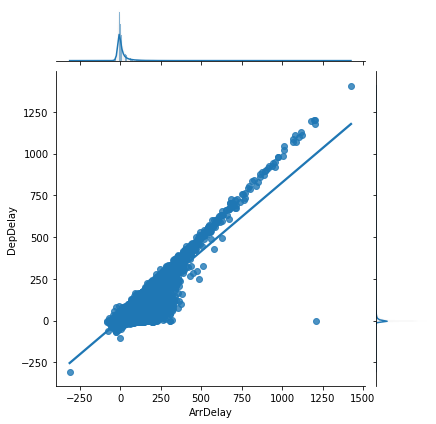

In [38]:
#Data visualisation
sns.jointplot(data=df_jan_2007, x="ArrDelay", y="DepDelay", kind="reg")

,ArrDelay,DepDelay
ArrDelay,1.000000,0.915881
DepDelay,0.915881,1.000000


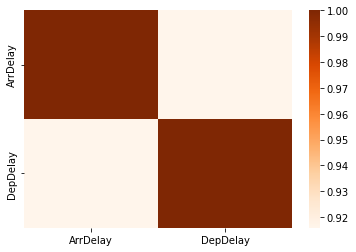

In [39]:
#Pearson correlation
corr_jan_2007 = arr_dep_2007.corr(method='pearson')
sns.heatmap(corr_jan_2007, cmap="Oranges")
corr_jan_2007

In [40]:
df_jan_2007['ArrDelay'].corr(df_jan_2007['DepDelay'])

0.915881154690886

#### Q5: Use the available variables to construct a model that predicts delays.

In [41]:
len(df_cleaned_2006)

7003796

In [42]:
len(df_cleaned_2007)

7275260

In [43]:
#Create new dataframes to work with
flights_predictions_2006 = df_cleaned_2006.copy()
flights_predictions_2007 = df_cleaned_2007.copy()

In [44]:
flights_predictions_2006.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003796 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [45]:
#Subsetting only 1,000,000 rows to perform analysis
flights_subset_2006 = flights_predictions_2006[0:1000000]
flights_subset_2007 = flights_predictions_2007[0:1000000]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.072102,0.006396,0.002827,0.000683,0.000931,-0.003972,0.061099,-0.049713,...,-0.050699,-0.000223,-0.017175,NaN,NaN,0.005011,0.001674,0.001121,0.010475,0.016430
DayofMonth,NaN,-0.072102,1.000000,-0.032982,-0.002929,-0.000959,0.004758,0.001458,-0.006016,0.003847,...,0.003265,-0.007016,-0.006352,NaN,NaN,-0.018828,-0.015607,-0.014955,0.005932,-0.025524
DayOfWeek,NaN,0.006396,-0.032982,1.000000,0.010577,0.010343,0.009326,0.009372,0.004991,0.011632,...,0.012701,0.001878,0.000125,NaN,NaN,0.011863,0.001202,-0.007516,-0.001683,0.001681
DepTime,NaN,0.002827,-0.002929,0.010577,1.000000,0.971878,0.754453,0.799156,-0.006825,-0.031972,...,-0.021947,0.041887,0.000395,NaN,NaN,0.056561,0.034648,0.059219,0.007854,0.151716
CRSDepTime,NaN,0.000683,-0.000959,0.010343,0.971878,1.000000,0.737127,0.791986,-0.013161,-0.029420,...,-0.016103,0.037294,-0.007545,NaN,NaN,0.016230,0.016196,0.025829,0.002492,0.119128
ArrTime,NaN,0.000931,0.004758,0.009326,0.754453,0.737127,1.000000,0.901303,-0.024689,0.038233,...,0.035601,0.045618,0.029181,NaN,NaN,0.018666,0.014904,0.064336,0.003291,0.059536
CRSArrTime,NaN,-0.003972,0.001458,0.009372,0.799156,0.791986,0.901303,1.000000,-0.038587,0.046421,...,0.050307,-0.015358,0.016042,NaN,NaN,0.015474,0.016622,0.042278,0.003877,0.109182
FlightNum,NaN,0.061099,-0.006016,0.004991,-0.006825,-0.013161,-0.024689,-0.038587,1.000000,-0.318326,...,-0.346516,0.027368,0.011885,NaN,NaN,0.040587,0.032709,-0.003368,0.001186,-0.017932
ActualElapsedTime,NaN,-0.049713,0.003847,0.011632,-0.031972,-0.029420,0.038233,0.046421,-0.318326,1.000000,...,0.962271,0.013718,0.243588,NaN,NaN,0.024584,0.013073,0.147835,0.002800,0.004773


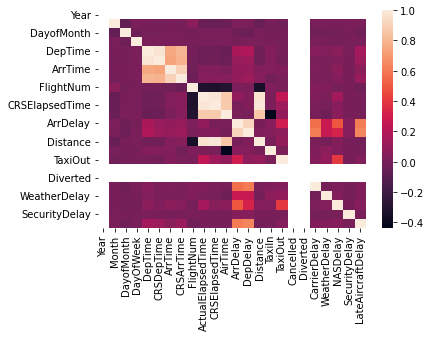

In [46]:
corr_2006 = flights_subset_2006.corr(method='pearson')
sns.heatmap(corr_2006)
corr_2006

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.060726,0.050088,0.008226,0.001789,-0.002480,-0.006142,0.059057,-0.066010,...,-0.065583,-0.009821,-0.032607,NaN,NaN,0.031441,0.014740,0.004664,0.002294,0.035601
DayofMonth,NaN,-0.060726,1.000000,-0.022694,-0.005255,-0.003314,0.002130,0.000349,-0.011636,0.009744,...,0.008192,-0.003254,0.019458,NaN,NaN,-0.010137,0.002406,-0.014046,-0.008656,-0.012948
DayOfWeek,NaN,0.050088,-0.022694,1.000000,0.004772,0.005884,0.001020,0.004852,0.003500,0.009841,...,0.010708,0.010066,-0.004282,NaN,NaN,0.010927,0.008610,0.003367,0.003075,0.002768
DepTime,NaN,0.008226,-0.005255,0.004772,1.000000,0.968298,0.737283,0.818134,-0.010461,-0.026486,...,-0.017134,-0.029912,-0.002768,NaN,NaN,0.057596,0.032231,0.051526,0.002379,0.179503
CRSDepTime,NaN,0.001789,-0.003314,0.005884,0.968298,1.000000,0.719223,0.812209,-0.026192,-0.022699,...,-0.009407,-0.035499,-0.015301,NaN,NaN,0.013344,0.005005,0.019904,-0.000120,0.130101
ArrTime,NaN,-0.002480,0.002130,0.001020,0.737283,0.719223,1.000000,0.876276,-0.021809,0.030376,...,0.030839,0.013805,0.011127,NaN,NaN,0.010558,0.008696,0.057991,-0.000771,0.074071
CRSArrTime,NaN,-0.006142,0.000349,0.004852,0.818134,0.812209,0.876276,1.000000,-0.038101,0.042361,...,0.050944,-0.006808,0.005340,NaN,NaN,0.013027,0.007518,0.032957,0.001074,0.122164
FlightNum,NaN,0.059057,-0.011636,0.003500,-0.010461,-0.026192,-0.021809,-0.038101,1.000000,-0.295857,...,-0.339927,0.026576,0.048011,NaN,NaN,0.068864,0.042742,0.010149,-0.001487,0.049341
ActualElapsedTime,NaN,-0.066010,0.009744,0.009841,-0.026486,-0.022699,0.030376,0.042361,-0.295857,1.000000,...,0.948659,0.152651,0.256231,NaN,NaN,0.021975,0.017935,0.160197,0.005002,0.000666


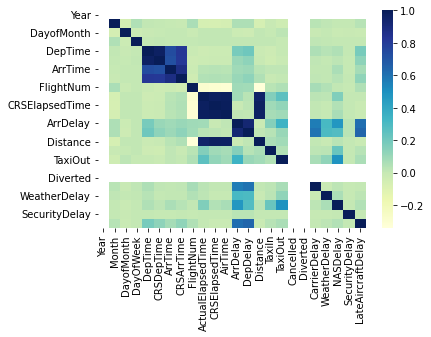

In [47]:
#Pearson correlation
corr_2007 = flights_subset_2007.corr(method='pearson')
sns.heatmap(corr_2007, cmap="YlGnBu")
corr_2007

In [48]:
#Correlation against ArrDelay
flights_subset_2006[flights_subset_2006.columns[1:]].corr()['ArrDelay'][:].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.914506
LateAircraftDelay    0.601503
CarrierDelay         0.567088
NASDelay             0.491584
TaxiOut              0.297946
WeatherDelay         0.274495
DepTime              0.163854
CRSDepTime           0.102038
CRSArrTime           0.099499
ArrTime              0.089538
ActualElapsedTime    0.085597
TaxiIn               0.055090
SecurityDelay        0.046351
Month                0.019262
FlightNum            0.018625
AirTime              0.016984
DayOfWeek            0.006331
CRSElapsedTime       0.005427
Distance             0.001341
DayofMonth          -0.036712
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64

In [49]:
#Correlation against ArrDelay
flights_subset_2007[flights_subset_2007.columns[1:]].corr()['ArrDelay'][:].sort_values(ascending=False)

ArrDelay             1.000000
DepDelay             0.925689
LateAircraftDelay    0.607594
CarrierDelay         0.562790
NASDelay             0.467164
TaxiOut              0.342406
WeatherDelay         0.313960
DepTime              0.178712
TaxiIn               0.148145
CRSDepTime           0.102589
CRSArrTime           0.101055
FlightNum            0.087503
ArrTime              0.086953
ActualElapsedTime    0.078936
Month                0.056436
SecurityDelay        0.027569
AirTime              0.010819
DayOfWeek            0.009601
CRSElapsedTime      -0.010009
Distance            -0.018439
DayofMonth          -0.023993
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64

In [50]:
flights_subset_2006.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [51]:
# filtering out unnecessary columns
flights_predictions_2006 = flights_subset_2006.drop(['Year','UniqueCarrier','TailNum','Origin','Dest',
                                              'CancellationCode','FlightNum','Year','Cancelled',
                                              'Diverted'],
                                             axis=1)

In [52]:
# filtering out unnecessary columns
flights_predictions_2007 = flights_subset_2007.drop(['Year','UniqueCarrier','TailNum','Origin','Dest',
                                              'CancellationCode','FlightNum','Year','Cancelled',
                                              'Diverted'],
                                             axis=1)

In [53]:
flights_predictions_2006.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [54]:
#Here we set if arrival delay is more than 15 minutes, it is considered a delayed flight
result =[]
for row in flights_predictions_2006['ArrDelay']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  

In [55]:
flights_predictions_2006['result'] = result

In [56]:
flights_predictions_2006.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,result
0,1,11,3,743.0,745,1024.0,1018,281.0,273.0,223.0,...,-2.0,1587,45,13,0,0,0,0,0,0
1,1,11,3,1053.0,1053,1313.0,1318,260.0,265.0,214.0,...,0.0,1587,27,19,0,0,0,0,0,0
2,1,11,3,1915.0,1915,2110.0,2133,235.0,258.0,220.0,...,0.0,1587,4,11,0,0,0,0,0,0
3,1,11,3,1753.0,1755,1925.0,1933,152.0,158.0,126.0,...,-2.0,872,16,10,0,0,0,0,0,0
4,1,11,3,824.0,832,1015.0,1015,171.0,163.0,132.0,...,-8.0,872,27,12,0,0,0,0,0,0
5,1,11,3,627.0,630,834.0,832,127.0,122.0,108.0,...,-3.0,644,6,13,0,0,0,0,0,0
6,1,11,3,825.0,820,1041.0,1021,136.0,121.0,111.0,...,5.0,644,4,21,0,0,20,0,0,1
7,1,11,3,942.0,945,1155.0,1148,133.0,123.0,121.0,...,-3.0,644,4,8,0,0,0,0,0,0
8,1,11,3,1239.0,1245,1438.0,1445,119.0,120.0,103.0,...,-6.0,644,4,12,0,0,0,0,0,0
9,1,11,3,1642.0,1645,1841.0,1845,119.0,120.0,105.0,...,-3.0,644,4,10,0,0,0,0,0,0


In [57]:
flights_predictions_2006['result'].value_counts()
## Not Delayed 801667
## Delayed 198333

0    801667
1    198333
Name: result, dtype: int64

In [58]:
#Here we set if arrival delay is more than 15 minutes, it is considered a delayed flight
result =[]
for row in flights_predictions_2007['ArrDelay']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  

In [59]:
flights_predictions_2007['result'] = result

In [60]:
flights_predictions_2007.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,result
0,1,1,1,1232.0,1225,1341.0,1340,69.0,75.0,54.0,...,7.0,389,4,11,0,0,0,0,0,0
1,1,1,1,1918.0,1905,2043.0,2035,85.0,90.0,74.0,...,13.0,479,5,6,0,0,0,0,0,0
2,1,1,1,2206.0,2130,2334.0,2300,88.0,90.0,73.0,...,36.0,479,6,9,3,0,0,0,31,1
3,1,1,1,1230.0,1200,1356.0,1330,86.0,90.0,75.0,...,30.0,479,3,8,23,0,0,0,3,1
4,1,1,1,831.0,830,957.0,1000,86.0,90.0,74.0,...,1.0,479,3,9,0,0,0,0,0,0
5,1,1,1,1430.0,1420,1553.0,1550,83.0,90.0,74.0,...,10.0,479,2,7,0,0,0,0,0,0
6,1,1,1,1936.0,1840,2217.0,2130,101.0,110.0,89.0,...,56.0,647,5,7,46,0,0,0,1,1
7,1,1,1,944.0,935,1223.0,1225,99.0,110.0,86.0,...,9.0,647,4,9,0,0,0,0,0,0
8,1,1,1,1537.0,1450,1819.0,1735,102.0,105.0,90.0,...,47.0,647,5,7,20,0,0,0,24,1
9,1,1,1,1318.0,1315,1603.0,1610,105.0,115.0,92.0,...,3.0,647,5,8,0,0,0,0,0,0


In [61]:
flights_predictions_2007['result'].value_counts()
## Not delayed 742836
## Delayed 257164

0    742836
1    257164
Name: result, dtype: int64

<AxesSubplot:>

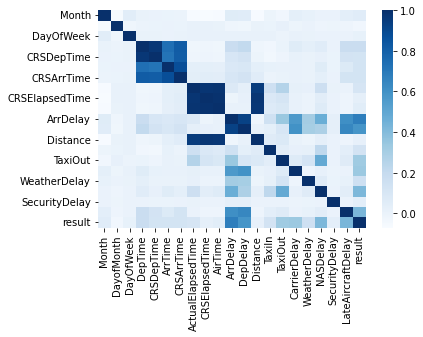

In [62]:
#Pearson Correlation 
corr_2007_2 = flights_predictions_2007.corr(method='pearson')
sns.heatmap(corr_2007_2, cmap="Blues")

In [63]:
#Remove columns not need
flights_predictions_2006 = flights_predictions_2006.drop(['DepTime', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'TaxiIn', 'TaxiOut','ArrDelay'],axis=1)
flights_predictions_2006.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'result'],
      dtype='object')

In [64]:
#Remove columns not need
flights_predictions_2007 = flights_predictions_2007.drop(['DepTime', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'TaxiIn', 'TaxiOut','ArrDelay'],axis=1)
flights_predictions_2007.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'result'],
      dtype='object')

In [65]:
#Creates new dataframe for modelling predictions
modelling_2006 = flights_predictions_2006
modelling_2007 = flights_predictions_2007

In [66]:
modelling_2007[modelling_2007.result == 1].shape[0]

257164

In [67]:
#Train-test split 70%/30% with random_state = 2022
modelling_2006 = modelling_2006.values
X, y = modelling_2006[:,:-1], modelling_2006[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022)

In [68]:
#Feature scaling of data
scaled_features_2006 = StandardScaler().fit_transform(X_train, X_test)

In [69]:
#Decision Tree/CART
clf_2006 = DecisionTreeClassifier()
clf_2006 = clf_2006.fit(X_train,y_train)

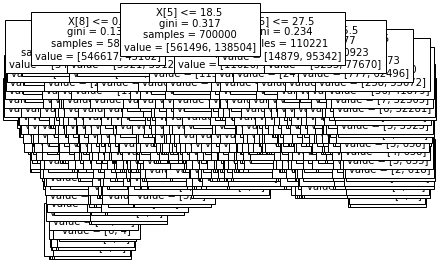

In [70]:
#Decision Tree plot
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure
figsize=(12,12)  # set plot size (denoted in inches)
tree.plot_tree(clf_2006, fontsize=10)
plt.title("Decision tree")
plt.show()

In [71]:
#Predictions & Accuracy
pred_prob_2006 = clf_2006.predict_proba(X_test)

In [72]:
#Accuracy using Area under curve method
auc_score_2006 = roc_auc_score(y_test, pred_prob_2006[:,1])
auc_score_2006
#Accuracy of 99.6%
print('AUC Score of Model is: {} %'.format(round(auc_score_2006*100,2)))

AUC Score of Model is: 99.9 %


In [73]:
#Confusion Matrix & Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_2006 = confusion_matrix(y_test, pred_prob_2006[:,1])
print("Confusion Matrix:")
print(cm_2006)
print("")
as_2006 = accuracy_score(y_test,pred_prob_2006[:,1])
print("Accuracy:",as_2006)

Confusion Matrix:
[[240089     82]
 [   102  59727]]

Accuracy: 0.9993866666666666


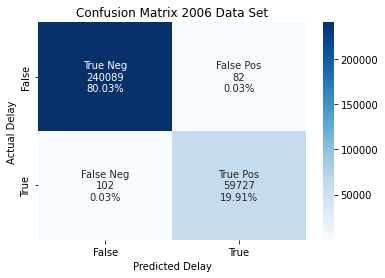

In [74]:
#Set names on Matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

#Total counts
group_counts = ["{0:0.0f}".format(value) for value in
                cm_2006.flatten()]

#Count/total percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_2006.flatten()/np.sum(cm_2006)]

#Set labels for names, counts and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
#Labels in 2by2 format
labels = np.asarray(labels).reshape(2,2)

#Plotting
ax = sns.heatmap(cm_2006, annot=labels, fmt='', cmap='Blues')

#Set title and x,y labels
ax.set_title('Confusion Matrix 2006 Data Set');
ax.set_xlabel('Predicted Delay')
ax.set_ylabel('Actual Delay');

#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#Display Confusion Matrix.
plt.show()

In [75]:
#Train-test split 70%/30% with random_state = 2022
modelling_2007 = modelling_2007.values
X, y = modelling_2007[:,:-1], modelling_2007[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022)

In [76]:
#Feature scaling of data
scaled_features_2007 = StandardScaler().fit_transform(X_train, X_test)

In [77]:
#Decision Tree/CART
clf_2007 = DecisionTreeClassifier()
clf_2007 = clf_2007.fit(X_train,y_train)

In [78]:
#Predictions & Accuracy
pred_prob_2007 = clf_2007.predict_proba(X_test)

In [79]:
#Accuracy using Area under curve method
auc_score_2007 = roc_auc_score(y_test, pred_prob_2007[:,1])
auc_score_2007
#Accuracy of 99.6%
print('AUC Score of Model is: {} %'.format(round(auc_score_2007*100,2)))

AUC Score of Model is: 99.92 %


In [80]:
#Confusion Matrix & Accuracy Score
cm_2007 = confusion_matrix(y_test, pred_prob_2007[:,1])
print("Confusion Matrix:")
print(cm_2007)
print("")
as_2007 = accuracy_score(y_test,pred_prob_2007[:,1])
print("Accuracy:",as_2007)

Confusion Matrix:
[[222915     65]
 [   103  76917]]

Accuracy: 0.99944


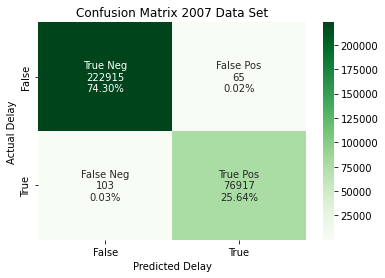

In [81]:
#Set names on Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']

#Total counts
group_counts = ["{0:0.0f}".format(value) for value in
                cm_2007.flatten()]

#Count/total percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_2007.flatten()/np.sum(cm_2007)]

#Set labels for names, counts and percentages
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

#Labels in 2by2 format
labels = np.asarray(labels).reshape(2,2)

#Plotting
ax = sns.heatmap(cm_2007, annot=labels, fmt='', cmap='Greens')

#Set title and x,y labels
ax.set_title('Confusion Matrix 2007 Data Set');
ax.set_xlabel('Predicted Delay')
ax.set_ylabel('Actual Delay');

#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

#Display Confusion Matrix.
plt.show()

In [ ]:
#END